# Machine Learning Script

**This script can be used to classify chemicals based on their phase spectra. Or, plot regression plots for mixtures.**

### IMPORT MODULES

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets, svm, metrics
from sniffing_functions import * # Functions specifically written for this project

### CLASSIFICATION OF COMPOUNDS (SVC)

**Run this cell to train and output results of the classification algorithm**

The possible input values for compounds are: Water, Ethanol, IPA, Pentane, Hexane, Heptane, Octane, Nonane, Decane, All

What procedure is it?: 2
What compounds do you want to classify? (i.e. 'All'): all
Training accuracy: 0.7962962962962963 (54)
Validation accuracy: 0.7222222222222222 (36)
What to call output file: Confusion Matrix - All compounds
Save figure? (Y/N): n


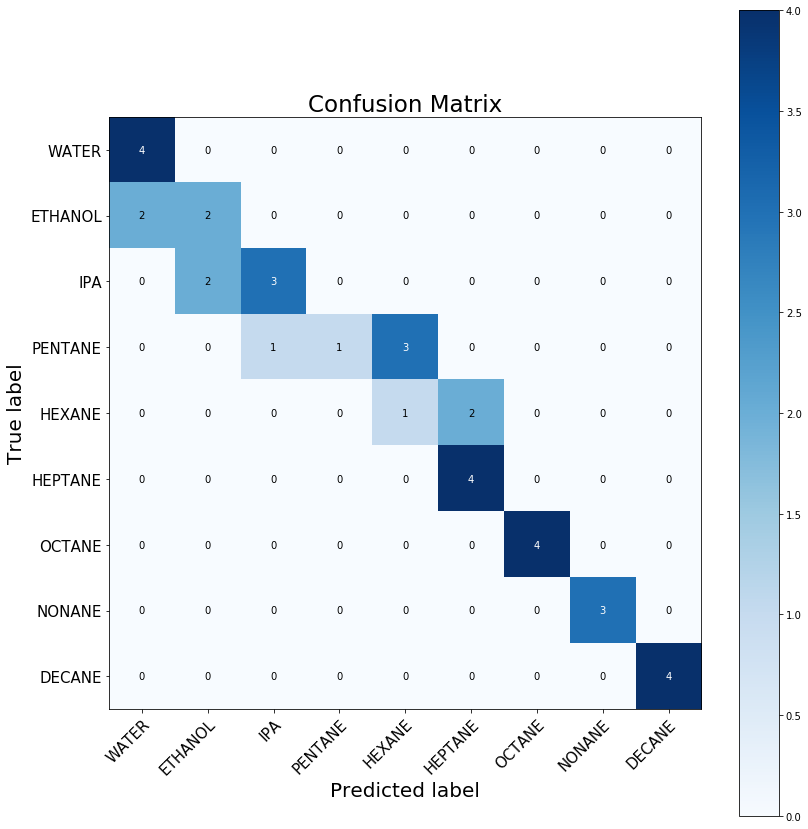

In [6]:
# ============== LOAD AND PROCESS DATA ====================
# Select procedure for classification
procedure = int(input("What procedure is it?: "))

# Prompt user for which chemicals to classify. 
phase_data, labels, str_labels = classification_data(procedure)

# Split data into train and test. Default test size = 40%. Choose a seed for random state.
trainx, testx, train_lbl, test_lbl = tts(phase_data, labels, test_size=0.4, random_state=32)

# ================== CLASSIFICATION ========================
SVC = svm.SVC(C=10000,gamma=1e-05, kernel='rbf')
SVC.fit(trainx, train_lbl)
predicted = SVC.predict(testx)

print("Training accuracy: " + str(SVC.score(trainx, train_lbl)) + " (" + str(len(train_lbl)) + ")")
print("Validation accuracy: " + str(SVC.score(testx, test_lbl)) + " (" + str(len(test_lbl)) + ")")

# ================= CONFUSION MATRIX =======================
num_labels = []

for i in str_labels: 
    c.execute(""" SELECT OdorID FROM Odors WHERE Name='%s'""" % i.upper())
    data = c.fetchall()[0][0]
    num_labels.append(data)

num2str = dict(zip(num_labels, str_labels))
str_y_true = [num2str[i] for i in test_lbl]
str_y_pred = [num2str[i] for i in predicted]

plot_confusion_matrix(str_y_true, str_y_pred, str_labels, title="Confusion Matrix")


# ========================= OUTPUT =========================
names = {2: "2 [short sniff]", 3: "3 [deep sniff]", 4: "4 [short held sniff]", 5: "5 [short sniff exhale]"}
name = input("What to call output file: ")
savefig = input("Save figure? (Y/N): ")

if savefig == 'Y':
    plt.savefig("Important Data Images/Procedure {}/{}.png".format(names[procedure], name))
else: 
    "Didn't save figure."

### Picking best C and Gamma values for classification

**Will output a heatmap specifying the best c and gamma combinations for the test set**

What procedure is it?: 2
What compounds do you want to classify? (i.e. 'All'): all


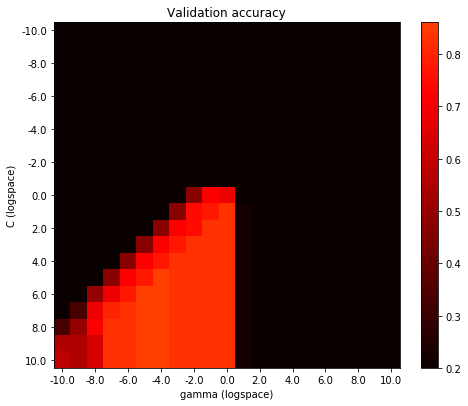

-------------------------------------------------- 
The best coefficient combinations are:

               C    Gamma     Score
0   1.000000e+05  0.00010  0.861111
1   1.000000e+06  0.00001  0.861111
2   1.000000e+06  0.00010  0.861111
3   1.000000e+07  0.00001  0.861111
4   1.000000e+07  0.00010  0.861111
5   1.000000e+08  0.00001  0.861111
6   1.000000e+08  0.00010  0.861111
7   1.000000e+09  0.00001  0.861111
8   1.000000e+09  0.00010  0.861111
9   1.000000e+10  0.00001  0.861111
10  1.000000e+10  0.00010  0.861111


In [7]:
# ============== LOAD AND PROCESS DATA ====================
procedure = int(input("What procedure is it?: "))
phase_data, labels, str_labels = classification_data(procedure)
trainx, testx, train_lbl, test_lbl = tts(phase_data, labels, test_size=0.4, random_state=32)

# ================== CLASSIFICATION ========================
scores = []
for c in np.logspace(-10,10, 21):
    for g in np.logspace(-10, 10, 21): 
        SVC = svm.SVC(C=c,gamma=g, kernel='rbf')
        SVC.fit(trainx, train_lbl)
        scores.append(SVC.score(testx, test_lbl))

scores = np.asarray(scores).reshape(21, 21)
from matplotlib.colors import Normalize


# =================== SCORES MATRIX ======================
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma (logspace)')
plt.ylabel('C (logspace)')

plt.xticks(np.linspace(0,20,11),
           map(str, np.linspace(-10,10,11)))
plt.yticks(np.linspace(0,20,11),
           map(str, np.linspace(-10,10,11)))
plt.colorbar()
plt.title('Validation accuracy')
plt.show()

# =================== SCORE TABLE ========================
best_c = list(np.where(scores == scores.max())[0])
best_gamma = list(np.where(scores == scores.max())[1])

mapped = dict(list(zip(range(21), np.logspace(-10,10, 21))))

best_scores = [[mapped[i], mapped[j], scores[i,j]] for (i,j) in zip(best_c, best_gamma)]

print('-'*50, '\nThe best coefficient combinations are:\n')
print(pd.DataFrame(best_scores, columns=["C", "Gamma", "Score"]))

### REGRESSION OF MIXTURES (SVR)

**Will train a regression model and output the results in a scatter plot.** 

The mixtures that already exist in the database are: 
* Water+etoh
* pent+hex
* pent+oct

What procedure is it?: 3
What compounds do you want to classify? (i.e. water+etoh): water+etoh
Training accuracy: 0.8120215221568401 (36)
Validation accuracy: 0.7587828598417575 (25)
What to call output file: beep
Save figure? (Y/N): n


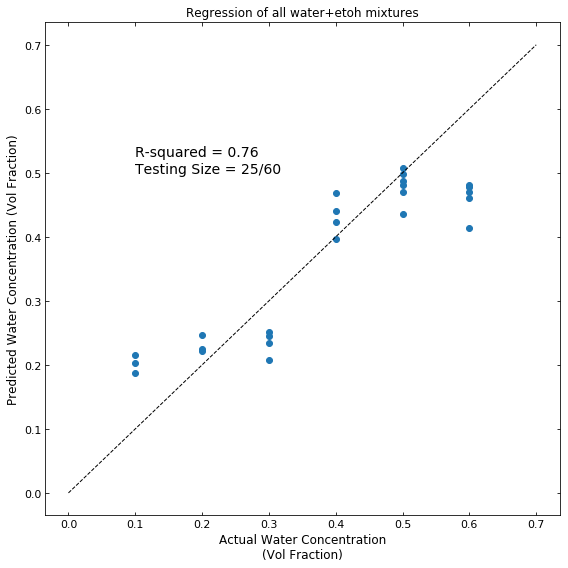

In [4]:
# ============== LOAD AND PROCESS DATA ====================
# Select procedure for classification
procedure = int(input("What procedure is it?: "))

# Prompt user for which chemicals to classify. 
phase_data, labels = regression_data(procedure)

# Split data into train and test. Default test size = 40%. Choose a seed for random state.
trainx, testx, train_lbl, test_lbl = tts(phase_data, labels, test_size=0.4, random_state=32)

# ================== REGRESSION ========================
SVR = svm.SVR(C=1, gamma=1, kernel='rbf')
SVR.fit(trainx, train_lbl)
predicted = SVR.predict(testx)

print("Training accuracy: " + str(SVR.score(trainx, train_lbl)) + " (" + str(len(train_lbl)) + ")")
print("Validation accuracy: " + str(SVR.score(testx, test_lbl)) + " (" + str(len(test_lbl)) + ")")

# ===================== PLOTS ===========================

plt.figure(figsize = (8,8))
plt.xlabel('Actual Water Concentration\n(Vol Fraction)', fontsize = 12)
plt.ylabel('Predicted Water Concentration (Vol Fraction)', fontsize = 12)
ax = plt.gca()
ax.tick_params(direction='in', top = True, bottom = True, left = True, right = True, labelsize = 11)

# plot line representing 1:1 correspondence
plt.plot(np.linspace(0,0.7,100),np.linspace(0,0.7,100),'--',c='k',linewidth=1)

# scatter predictions
plt.scatter(test_lbl,predicted)
plt.title("Regression of all water+etoh mixtures")
plt.text(0.1, 0.5, 'R-squared = %0.2f\nTesting Size = 25/60' % (calculate_R2(test_lbl, predicted)), fontsize=14)

plt.tight_layout()

# ========================= OUTPUT =========================
names = {2: "2 [short sniff]", 3: "3 [deep sniff]", 4: "4 [short held sniff]", 5: "5 [short sniff exhale]"}
name = input("What to call output file: ")
savefig = input("Save figure? (Y/N): ")

if savefig == 'Y':
    plt.savefig("Important Data Images/Procedure {}/{}.png".format(names[procedure], name))
else: 
    "Didn't save figure."